In [7]:
import os
import sys
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [8]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

In [9]:
# weight decaying
# weight_decay_lambda=0 means 'do not apply weight decaying'.
weight_decay_lambda = 0.1

In [10]:
network = MultiLayerNet(input_size=784,
                        hidden_size_list=[100 for _ in range(6)],
                        output_size=10,
                        weight_decay_lambda=weight_decay_lambda,
)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

In [11]:
epoch_cnt = 0
for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        print('epoch: %d, train_acc: %.3f, test_acc: %.3f' % (epoch_cnt, train_acc, test_acc))
        
        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

epoch: 0, train_acc: 0.083, test_acc: 0.076
epoch: 1, train_acc: 0.097, test_acc: 0.080
epoch: 2, train_acc: 0.117, test_acc: 0.087
epoch: 3, train_acc: 0.123, test_acc: 0.097
epoch: 4, train_acc: 0.143, test_acc: 0.107
epoch: 5, train_acc: 0.170, test_acc: 0.119
epoch: 6, train_acc: 0.193, test_acc: 0.133
epoch: 7, train_acc: 0.270, test_acc: 0.152
epoch: 8, train_acc: 0.280, test_acc: 0.163
epoch: 9, train_acc: 0.303, test_acc: 0.175
epoch: 10, train_acc: 0.333, test_acc: 0.195
epoch: 11, train_acc: 0.353, test_acc: 0.210
epoch: 12, train_acc: 0.383, test_acc: 0.221
epoch: 13, train_acc: 0.383, test_acc: 0.231
epoch: 14, train_acc: 0.400, test_acc: 0.240
epoch: 15, train_acc: 0.390, test_acc: 0.247
epoch: 16, train_acc: 0.410, test_acc: 0.261
epoch: 17, train_acc: 0.423, test_acc: 0.273
epoch: 18, train_acc: 0.440, test_acc: 0.275
epoch: 19, train_acc: 0.453, test_acc: 0.294
epoch: 20, train_acc: 0.487, test_acc: 0.310
epoch: 21, train_acc: 0.507, test_acc: 0.331
epoch: 22, train_acc

epoch: 184, train_acc: 0.860, test_acc: 0.700
epoch: 185, train_acc: 0.887, test_acc: 0.706
epoch: 186, train_acc: 0.877, test_acc: 0.709
epoch: 187, train_acc: 0.893, test_acc: 0.704
epoch: 188, train_acc: 0.880, test_acc: 0.700
epoch: 189, train_acc: 0.867, test_acc: 0.705
epoch: 190, train_acc: 0.863, test_acc: 0.701
epoch: 191, train_acc: 0.877, test_acc: 0.706
epoch: 192, train_acc: 0.873, test_acc: 0.703
epoch: 193, train_acc: 0.857, test_acc: 0.705
epoch: 194, train_acc: 0.860, test_acc: 0.708
epoch: 195, train_acc: 0.887, test_acc: 0.710
epoch: 196, train_acc: 0.860, test_acc: 0.712
epoch: 197, train_acc: 0.883, test_acc: 0.716
epoch: 198, train_acc: 0.880, test_acc: 0.709
epoch: 199, train_acc: 0.877, test_acc: 0.716
epoch: 200, train_acc: 0.887, test_acc: 0.719


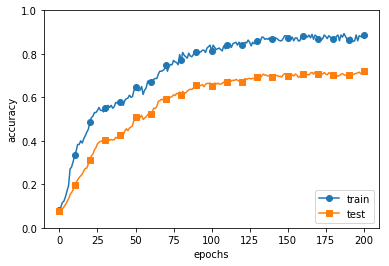

In [12]:
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()